# Visual Inspection of Motorcycle Connecting Rods

## First Task

Students should develop a software system aimed at visual inspection of motorcycle connecting rods. The system should be able to analyse the dimensions of two different types of connecting rods to allow a vision-guided robot to pick and sort rods based on their type and dimensions. The two rod types are characterized by a different number of holes:
- Type A rods have one hole
- Type B rods have two holesles

### Images loading

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

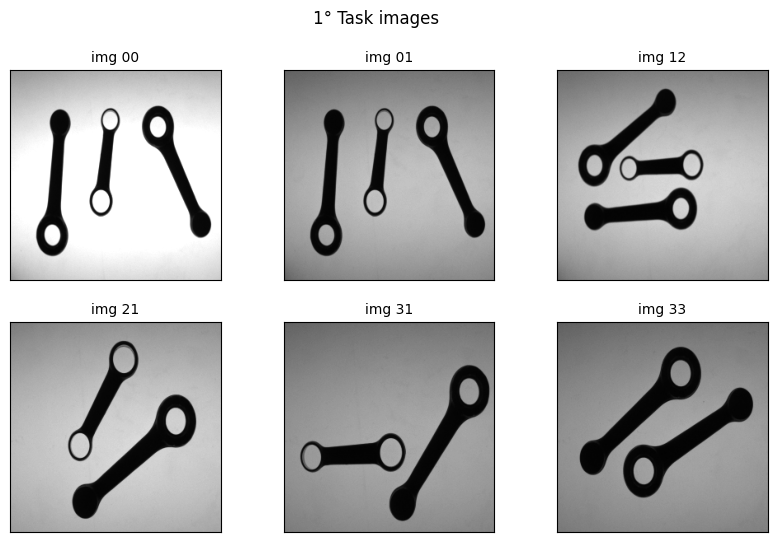

In [2]:
# image loading
image_numbers = ["00","01","12","21","31","33"]
images = []

for x in image_numbers:
    img_path = "img/TESI" + f"{x}" + ".BMP"
    image_x = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    images.append(image_x)

################# plots #################

fig1, axes1 = plt.subplots(2, 3, figsize=(10, 6))
# plotting images in 3x2 subplots figure
for i, ax in enumerate(axes1.flat):
    ax.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"img {image_numbers[i]}", fontsize=10)
    # hiding axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

fig1.suptitle("1° Task images")
plt.show()  # show full figure

### Grayscale histograms

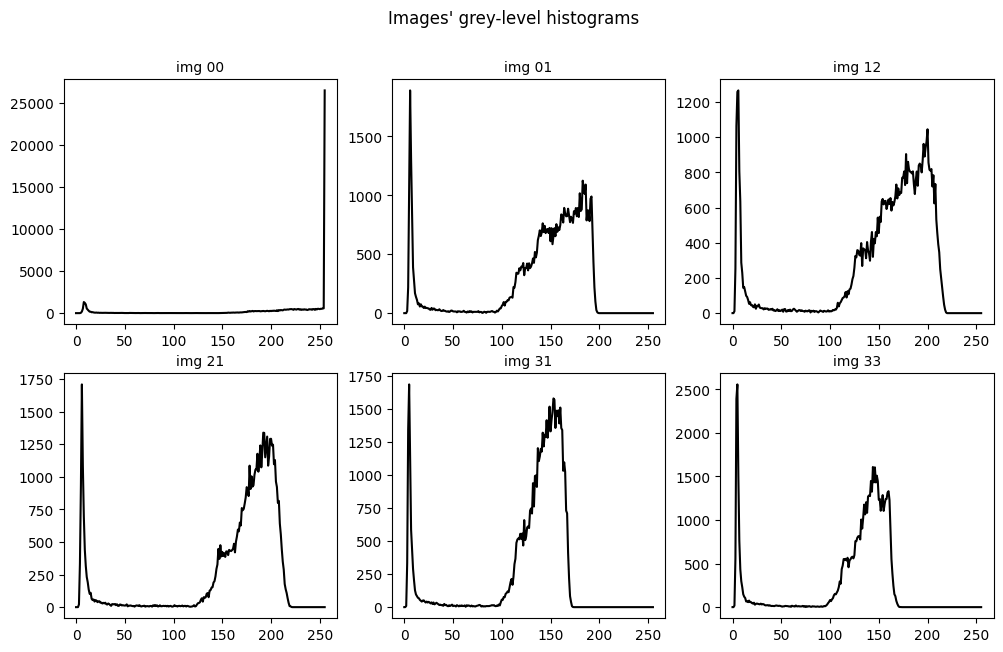

In [3]:
# both this arrays contain 6 elements, each of which is again an array. (initialize empty for number of elements)
histograms = [0] * len(images)   # arrays where each element is a number representing the frequency for that bin
bins = [0] * len(images)        # arrays where each element is a float representing the border for the current bin (eg. 0. 20. 40. 60. ...)

fig2, axes2 = plt.subplots(2, 3, figsize=(12, 7))    

for j, img in enumerate(images):
    histograms[j], bins[j] = np.histogram(img.flatten(), 256, [0,256])  # 256 bins where each is a single grey value. [0,256] is the intensity interval in which the histogram is calculated

# print("======= debugging =======")
# print("num of histograms: " + str(len(histograms)))
# print(histograms[0])
# print(histograms[1])
# print("=========================")

for k, ax in enumerate(axes2.flat):
# debugging
    # print(histograms[k].shape)        array 1-dim with 256 elements
    # print(np.sum(histograms[k]))      65280 each
    ax.plot(histograms[k], color="black")
    ax.set_title(f"img {image_numbers[k]}", fontsize=10)

fig2.suptitle("Images' grey-level histograms")
plt.show()  # show full figure

### Linear stretching
In order to enhance the contrast of the images a linear stretching will be applied.
Let's test 3 different functions to get the best results:
- max and min of the image
- fixed max and min
- dynamic max and min

max: 221 min: 3


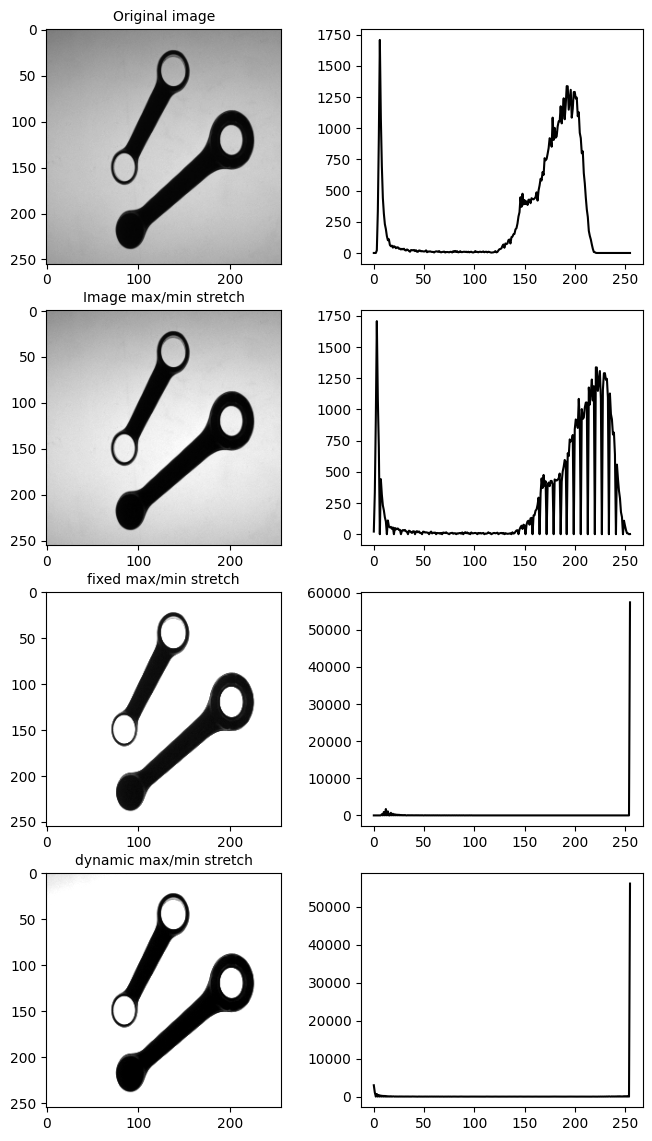

In [4]:
# Starting with a single image to test the best approach for linear stretching
IUT = 3   #Image Under Test

def linear_stretching(img, max_value, min_value):
    # boolean array used as argument of img[]
    img[img<min_value] = min_value
    img[img>max_value] = max_value
    linear_stretched_img = 255./(max_value-min_value)*(img-min_value)
    # print("Output image type: ", linear_stretched_img.dtype)
    return linear_stretched_img


def find_percentile_value(hist, percentile):
    s = 0
    idx = 0
    total_pixel = np.sum(hist)
    while(s < total_pixel*percentile/100):
        s += hist[idx]
        idx += 1
    return idx

# stretching with min and max of the image
max_value = np.max(images[IUT])
min_value = np.min(images[IUT])

print(f"max: {max_value} min: {min_value}")

linear_stretched_img=linear_stretching(np.copy(images[IUT]), max_value,min_value)
histogram_st, bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])

# stretching with fixed max and min
max_value = 120
min_value = 0
linear_stretched_img_fix=linear_stretching(np.copy(images[IUT]), max_value,min_value)
histogram_st_fix, bins = np.histogram(linear_stretched_img_fix.astype(np.uint8).flatten(),256,[0,256])

# stretching with dynamic max and min
max_value = find_percentile_value(histograms[IUT], 14)
min_value = find_percentile_value(histograms[IUT], 1)
linear_stretched_img_dyn=linear_stretching(np.copy(images[IUT]), max_value,min_value)
histogram_st_dyn, bins = np.histogram(linear_stretched_img_dyn.astype(np.uint8).flatten(),256,[0,256])

################# plots #################

# plot of original image and histogram
fig3, axes3 = plt.subplots(4, 2, figsize=(8, 14))
axes3.flat[0].imshow(images[IUT], cmap='gray', vmin=0, vmax=255)
axes3.flat[1].plot(histograms[IUT], color="black")
axes3.flat[0].set_title("Original image", fontsize=10)

# plot of linear stretch with max and min of the image
axes3.flat[2].imshow(linear_stretched_img, cmap='gray', vmin=0, vmax=255)
axes3.flat[3].plot(histogram_st, color="black")
axes3.flat[2].set_title("Image max/min stretch", fontsize=10)

# plot of linear stretch with fixed max and min
axes3.flat[4].imshow(linear_stretched_img_fix, cmap='gray', vmin=0, vmax=255)
axes3.flat[5].plot(histogram_st_fix, color="black")
axes3.flat[4].set_title("fixed max/min stretch", fontsize=10)

# plot of linear stretch with dyn max and min
axes3.flat[6].imshow(linear_stretched_img_dyn, cmap='gray', vmin=0, vmax=255)
axes3.flat[7].plot(histogram_st_dyn, color="black")
axes3.flat[6].set_title("dynamic max/min stretch", fontsize=10)

plt.show()

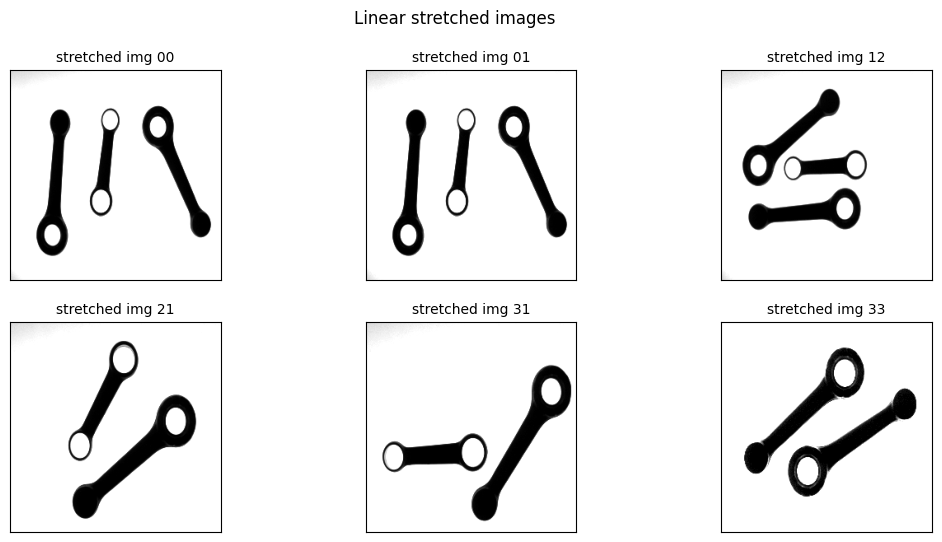

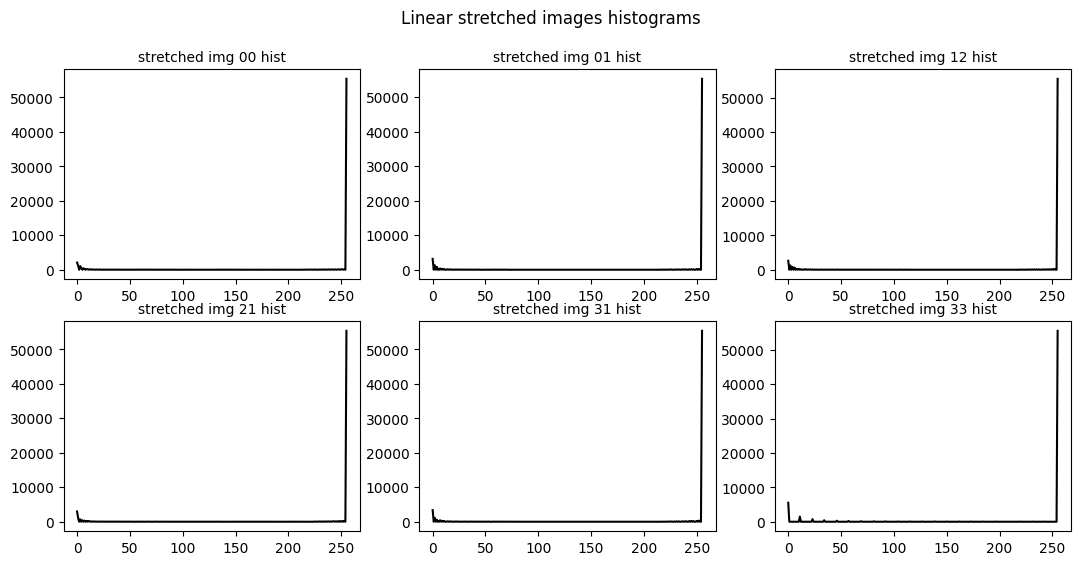

In [5]:
# applying chosen method to all images: dynamic range
images_st = []
histograms_st = [0] * len(images)
bins_st = [0] * len(images)

# dynamic stretching every image
for i, img in enumerate(images):
    max_value = find_percentile_value(histograms[i], 15)        # for functions run cell above
    min_value = find_percentile_value(histograms[i], 1)
    linear_stretched_img=linear_stretching(np.copy(images[i]), max_value,min_value)
    images_st.append(linear_stretched_img)
    histograms_st[i], bins_st[i] = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])

################# plots #################

# plotting linear stretched images
fig4, axes4 = plt.subplots(2, 3, figsize=(13, 6))
fig4.suptitle("Linear stretched images")
for j, ax in enumerate(axes4.flat):
    ax.imshow(images_st[j], cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"stretched img {image_numbers[j]}", fontsize=10)
    ax.set_xticks([])     # hiding axis ticks
    ax.set_yticks([])

fig5, axes5 = plt.subplots(2, 3, figsize=(13, 6))
fig5.suptitle("Linear stretched images histograms")
for k, ax in enumerate(axes5.flat):
    ax.plot(histograms_st[k], color="black")
    ax.set_title(f"stretched img {image_numbers[k]} hist", fontsize=10)

plt.show()

### Image binarization & inversion

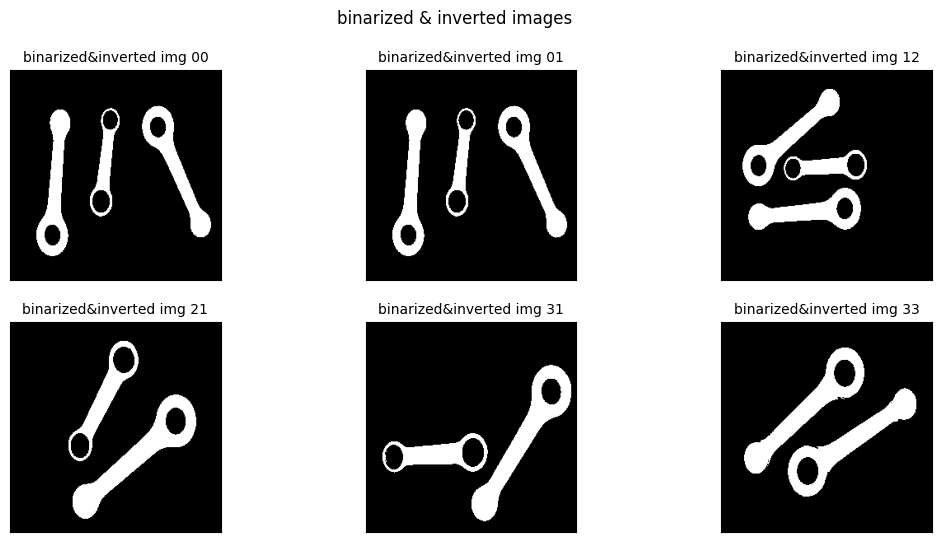

In [6]:
# additional step to convert optimal linear stretched images in binarized images before starting connectivity identification
# a bitwise_not function is also used to prepare the images for the correct pairs (white-component, black-background)

images_bin = []

for i, img in enumerate(images_st):
    rettresh, bin_img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)  
    bin_img = np.clip(bin_img, 0, 255).astype(np.uint8)  # added to fix future cast float64 -> uint8 (clipping solves NaN values generated during binarization)
    inv_img = cv2.bitwise_not(bin_img)
    images_bin.append(inv_img)

################# plots #################

fig6, axes6 = plt.subplots(2, 3, figsize=(13, 6))
fig6.suptitle("binarized & inverted images")
for j, ax in enumerate(axes6.flat):
    ax.imshow(images_bin[j], cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"binarized&inverted img {image_numbers[j]}", fontsize=10)
    ax.set_xticks([])     # hiding axis ticks
    ax.set_yticks([])

plt.show()

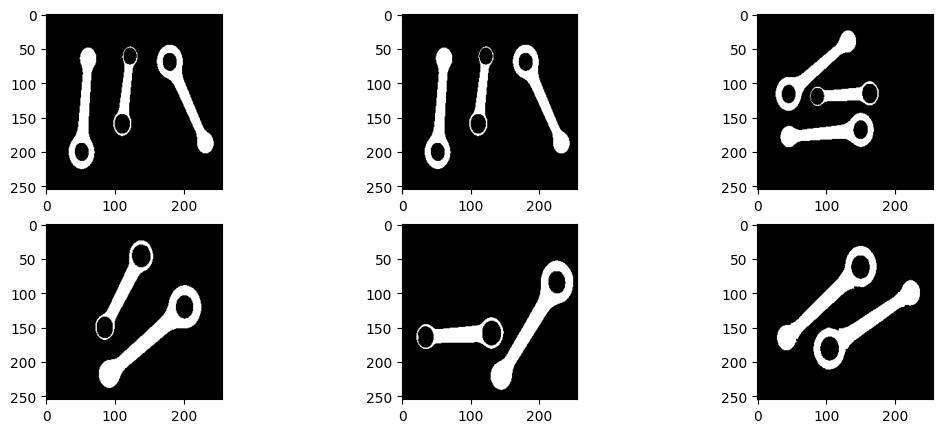

In [7]:
#### EXTRA: erosion of images

er_images = []

fig, axes = plt.subplots(2, 3, figsize=(13, 5))

kernel = np.ones((2,2),np.uint8)

for i, img in enumerate(images_bin): 
    erosion = cv2.erode(img,kernel,iterations = 1)
    er_images.append(erosion)
        
    axes.flat[i].imshow(erosion, cmap='gray')

plt.show()

### Connected components identification

An OpenCV function (_cv2.connectedComponentsWithFeatures_) is going to be used to identify and tag objects inside of the modified images.

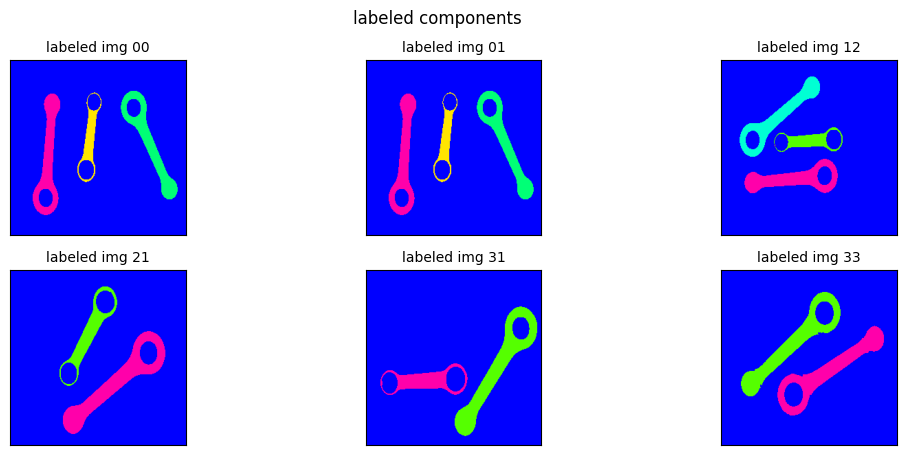

In [18]:
# returned elements in order: number of objects identified, image with labels, array of stats for each
# component, array with [x,y] coords of the centroids of each component

components = []           # list that will contain all the num_labels, labels, stats and centroids for each image
labeled_images = []       # list that will contain all the images, color tagged, containing the found components
labeled_blank_images = [] # EXTRA: saving also the binarized images in a separate list

for i, img in enumerate(er_images):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(er_images[i].astype(np.uint8), connectivity=8, ltype=cv2.CV_32S) # labels being the image with the found components, all tagged with different enumeration
    # nb: .astype(np.uint8) is needed to convert float64 to uint8 bit depth of image (required by connectedComponentsWithStats)
    components.append([num_labels, labels, stats, centroids])

    # Color tagging ----------------------
    
    # random color map for tagging
    label_hue = np.uint8(140 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # converting from HSV to BGR for visualization
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # variant: set background color to white
    # labeled_img[labels == 0] = [255, 255, 255]

    # ------------------------------------

    labeled_blank_images.append(labels.astype(np.uint8))
    labeled_images.append(labeled_img)

    # print(f"labeled image n° {i} shape: " + str(labeled_img.shape) + " - n° components " + str(num_labels-1))

######################################### PLOTS #########################################

fig7, axes7 = plt.subplots(2, 3, figsize=(13, 5))
fig7.suptitle("labeled components")
for j, ax in enumerate(axes7.flat):
    ax.imshow(labeled_images[j])
    ax.set_title(f"labeled img {image_numbers[j]}", fontsize=10)
    ax.set_xticks([])     # hiding axis ticks
    ax.set_yticks([])

plt.show()

In [9]:
# Salva l'array dei pixel come file di testo
np.savetxt('immagine.txt', labels, fmt='%d')

### Contour identification
Using the binarized images we are going to apply __cv2.findContours__ to get the contours of each component inside the images.

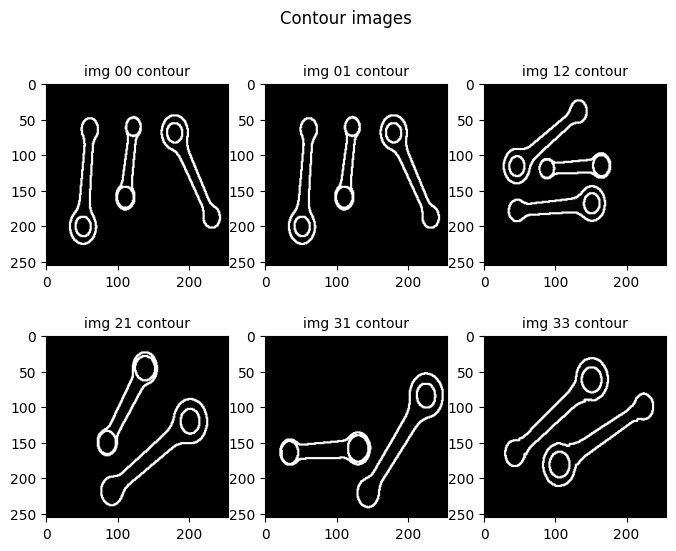

In [10]:
# Extracting all the contours from each image, then saving the images with contours in a dictionary, and the contours tuples in another
# N.B. dictionaries' keys start from 0 increasing by 1 for each image, thus matching the image indexes

cnt_full_images = {}   
cnt_full_dict = {}

fig9, axes9 = plt.subplots(2, 3, figsize=(8, 6))
fig9.suptitle("contour shapes for each image")

for i, img in enumerate(labeled_blank_images):
    temp_img = np.copy(img)
    
    # CONTOURS: tuple containing numpy arrays (of shape X,1,2), one for each contour coordinates - e.g. first part: contours[0].shape = (115, 1, 2) (115 elements, each is 1 tuple, each with 2 coordinates x - y)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)   # Retrieval mode: tree - Approximation of contour: simple (for straight lines only extremum points are stored, saves memory!)
    cv2.drawContours(temp_img, contours, -1, (255,255,255), 2)   # -1 argument specifies that every contour has to be drawn
    cnt_full_images[i] = temp_img
    cnt_full_dict[i] = contours

    # for k in range(len(contours)):
        # print(contours[k][:,0,:])   # print all coordinates of each parts' contour

    axes9.flat[i].imshow(temp_img, cmap='gray')
    axes9.flat[i].set_title(f"img {image_numbers[i]} contour", fontsize=10)
    
plt.suptitle('Contour images')    
plt.show()

### Oriented bounding box
The next step consists in calculating the bounding box of the components to the get the correct MER (Minimum Enclosing Rectangle) and thus the correct values of width, heigth and orientation.

Image 00 - part 0 : center_coords=((52.43274688720703, 136.93836975097656))
Width=37.10179901123047, Height=176.20703125, area=6537.597857803106 Orientation=0.8680515289306641

Image 00 - part 1 : center_coords=((51.5, 200.5))
Width=21.0, Height=27.0, area=567.0 Orientation=0.0

Image 00 - part 2 : center_coords=((114.827880859375, 111.89344787597656))
Width=25.89322280883789, Height=130.73361206054688, area=3385.1145456879167 Orientation=5.19442892074585

Image 00 - part 3 : center_coords=((110.5, 159.5))
Width=23.0, Height=29.0, area=667.0 Orientation=0.0

Image 00 - part 4 : center_coords=((122.0, 61.0))
Width=20.0, Height=26.0, area=520.0 Orientation=0.0

Image 00 - part 5 : center_coords=((200.62930297851562, 125.1254653930664))
Width=168.06759643554688, Height=38.59892272949219, area=6487.22816814715 Orientation=69.59979248046875

Image 00 - part 6 : center_coords=((179.5, 69.5))
Width=21.0, Height=27.0, area=567.0 Orientation=0.0

Image 01 - part 0 : center_coords=((52.432746887

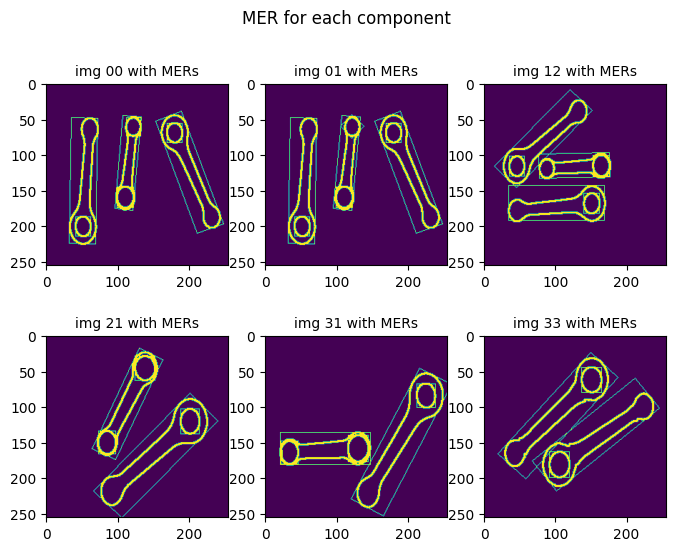

In [11]:
rect_dict = {}   # dictionary where at each key element there is a list containing all the MERs of the components of the current image

fig10, axes10 = plt.subplots(2, 3, figsize=(8, 6))
fig10.suptitle("MER for each component")

for i, cnt in enumerate(cnt_full_dict):
    rect_dict[i] = []   # initialized empty list
    img_copy = np.copy(cnt_full_images[i])   # copy image used for drawing the MER - same shape for cnt_full_images and cnt_full_dict

    for j in range(len(cnt_full_dict[i])):            # iterating on number of components in i-th image
        rect = cv2.minAreaRect(cnt_full_dict[i][j])   # min rect for each component
        center, (width, height), angle = rect         # tuple x.y, tuple w.h, float

        print(f"Image {image_numbers[i]} - part {j} : center_coords=({center})\nWidth={width}, Height={height}, area={width*height} Orientation={angle}\n")
        rect_dict[i].append(rect)   # rect_dict MERs and cnt_full_dict have the parts ordered in the same way (one containing the MERs and the other the contours coordinates)
    
        # drawing rectangles
        box = cv2.boxPoints(rect)   # outputs the 4 vertexes of the input rectangle
        box = np.intp(box)
        cv2.drawContours(img_copy, [box], -1, (255,0,0), 1)

    axes10.flat[i].imshow(img_copy)
    axes10.flat[i].set_title(f"img {image_numbers[i]} with MERs", fontsize=10)


plt.show()

### Area tresholding for holes identification and Rod Type recognition
The components whose area is smaller than a certain amount are certainly the holes of the rods. We can thus identify the two different entities by a simple tresholding.

The holes **positions** and **radii** are reported in this section, during the classification process.

In [19]:
# we need to create an item that holds all the parts, with rod-hole distinction and rod type, in an indexed list (dictionary).
MER_dict = {}
cnt_rods_dict = {}
treshold_rod  = 1200  # less than this, classify as hole
treshold_hole = 15    # less than this, remove from list (noise)

# ---------------------------------------------------------------------------------
def getDistance(p1,p2):
    if (not isinstance(p1, tuple) or not isinstance(p2, tuple)):
        print("wrong input - not tuple")
        return 0

    x1,y1 = tuple(map(float,p1))
    x2,y2 = tuple(map(float,p2)) 
    dist = np.sqrt(np.square(abs(x1-x2))+np.square(abs(y1-y2)))
    return dist
# ---------------------------------------------------------------------------------
# starting from some verified assumptions: hole MERs are inside rod MERs, minimal error.
# if a MER is a hole, it must belong to some part; this can speed up the research.
# knowing this, the part in which the hole belongs is certainly the one whose center is nearer.
def getRodTypes(rods, holes):
    if (not isinstance(rods, list) or not isinstance(holes, list)):
        print("wrong input")
        return 0
    
    types = []
    rods_holes_count = {}
    for j, rod in enumerate(rods):   # first loop to initialize each rod at 0 hole count
        rods_holes_count[j] = 0
        
    for i, hole in enumerate(holes):   
        min_dist  = 360.   # starting with a high value for comparison at each iteration
        found_rod = -1    # -1 should never appear as every rod has at least one hole 
        
        for j, rod in enumerate(rods):
            # print(f"hole {i} - rod {j} - distance " + str(getDistance(rod[0],hole[0]))) 
            if (getDistance(rod[0],hole[0]) <= min_dist):
                min_dist  = getDistance(rod[0],hole[0])
                found_rod = j   # at the end of the j cycle this prompts the owner rod of the i-th hole

        rods_holes_count[found_rod] += 1

    for k in range(len(rods)):  # cycling in the same order all the rods 
        if (rods_holes_count[k] < 2):
            types.append('A')   # A is 1 hole rod
        else:
            types.append('B')   # B is 2 holes rod

    return types
# ---------------------------------------------------------------------------------
# scanning to either find holes/parts or removing noise
for i in range(len(rect_dict)):
    MER_dict[i] = []   # mer_dict[IMAGE_NUM] = [[RODS],[HOLES]]
    cnt_rods_dict[i] = []   # cnt_rods_dict[IMAGE_NUM] = [CNT_ROD1, CNT_ROD2, . . . ]
    rods  = []   # a list in which store the parts of the i-th image
    holes = []   # a list in which store the holes in the i-th image

    for j, MER in enumerate(rect_dict[i]):   # enumerating (with j variable) all the MERs of the i-th image
        area = MER[1][0] * MER[1][1]   # width * height for the i-th entry in rect_dict
        # print(f"image {i} - part {j} - area {area}")
        if (area < treshold_rod):
            if (area < treshold_hole):
                # print(f"img {i} - removed part {j}")   # 🕷
                rect_dict[i].pop(j)   # removing all the wronlgy identified MERs (noise)
            else:
                radius_hole = np.sqrt(area/np.pi)
                holes.append(MER)
                print("Hole in image {} at position ({:.1f},{:.1f}) with a diameter of {:.1f} pixels.".format(i, MER[0][0], MER[0][1], radius_hole*2))
        else:
            rods.append(MER)
            cnt_rods_dict[i].append(cnt_full_dict[i][j])   # taking only the rods contours directly from the full contours dictionary
            # this way MER_dict[i][0] (rods MERs dictionary) will have the same number of elements, in the same order, of this new contour dictionary
            
    
    MER_dict[i].append(rods)
    MER_dict[i].append(holes)

####################################################################################
# inserting part type inside the dictionary
# ⏭ MER_dict[IMAGE_NUM] = [[RODS],[HOLES],[RODS_TYPES]] !   -   each rod in RODS and hole in HOLES has as the first entry the tuple (x,y) of its barycenter, second entry is a tuple(width, height) and third entry is the angle

for i in range(len(MER_dict)):
    MER_dict[i].append(getRodTypes(MER_dict[i][0],MER_dict[i][1]))  # getRodTypes(rods, holes)

Hole in image 0 at position (51.5,200.5) with a diameter of 26.9 pixels.
Hole in image 0 at position (110.5,159.5) with a diameter of 29.1 pixels.
Hole in image 0 at position (122.0,61.0) with a diameter of 25.7 pixels.
Hole in image 0 at position (179.5,69.5) with a diameter of 26.9 pixels.
Hole in image 1 at position (51.5,200.5) with a diameter of 26.9 pixels.
Hole in image 1 at position (110.5,159.5) with a diameter of 29.1 pixels.
Hole in image 1 at position (121.5,61.0) with a diameter of 26.3 pixels.
Hole in image 1 at position (179.5,69.5) with a diameter of 26.9 pixels.
Hole in image 2 at position (150.0,168.0) with a diameter of 28.0 pixels.
Hole in image 2 at position (163.5,115.5) with a diameter of 29.1 pixels.
Hole in image 2 at position (45.5,116.0) with a diameter of 27.4 pixels.
Hole in image 3 at position (201.0,120.5) with a diameter of 34.0 pixels.
Hole in image 3 at position (85.0,150.0) with a diameter of 31.3 pixels.
Hole in image 3 at position (138.0,46.0) with 

### Computation of width at barycenter

(37, 137)
VALORE INTENSITA': 0
(38, 137)
VALORE INTENSITA': 0
(39, 137)
VALORE INTENSITA': 0
(40, 137)
VALORE INTENSITA': 0
(41, 137)
VALORE INTENSITA': 0
(42, 137)
VALORE INTENSITA': 0
(43, 137)
VALORE INTENSITA': 0
(44, 137)
VALORE INTENSITA': 0
(45, 137)
VALORE INTENSITA': 0
(46, 137)
VALORE INTENSITA': 0
(47, 137)
VALORE INTENSITA': 0
(48, 137)
VALORE INTENSITA': 255
(49, 137)
VALORE INTENSITA': 255
(50, 137)
VALORE INTENSITA': 255
(51, 137)
VALORE INTENSITA': 255
(52, 137)
VALORE INTENSITA': 255
(53, 137)
VALORE INTENSITA': 255
(54, 137)
VALORE INTENSITA': 255
(55, 137)
VALORE INTENSITA': 255
(56, 137)
VALORE INTENSITA': 255
(57, 137)
VALORE INTENSITA': 255
(58, 137)
VALORE INTENSITA': 255
(59, 137)
VALORE INTENSITA': 255
(60, 137)
VALORE INTENSITA': 255
(61, 137)
VALORE INTENSITA': 255
(62, 137)
VALORE INTENSITA': 255
(63, 137)
VALORE INTENSITA': 0
(64, 137)
VALORE INTENSITA': 0
(65, 137)
VALORE INTENSITA': 0
(66, 137)
VALORE INTENSITA': 0
(67, 137)
VALORE INTENSITA': 0


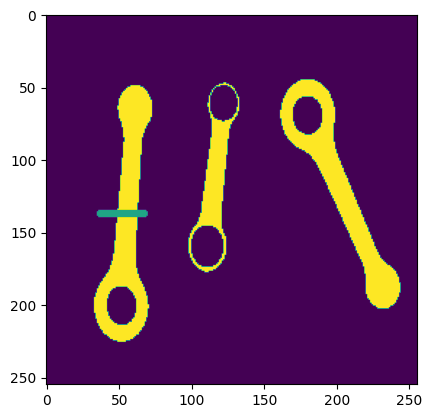

(99, 110)
VALORE INTENSITA': 0
(100, 111)
VALORE INTENSITA': 0
(101, 111)
VALORE INTENSITA': 0
(102, 111)
VALORE INTENSITA': 0
(103, 111)
VALORE INTENSITA': 0
(104, 111)
VALORE INTENSITA': 0
(105, 111)
VALORE INTENSITA': 0
(106, 111)
VALORE INTENSITA': 0
(107, 111)
VALORE INTENSITA': 0
(108, 111)
VALORE INTENSITA': 0
(109, 111)
VALORE INTENSITA': 255
(110, 111)
VALORE INTENSITA': 255
(111, 112)
VALORE INTENSITA': 255
(112, 112)
VALORE INTENSITA': 255
(113, 112)
VALORE INTENSITA': 255
(114, 112)
VALORE INTENSITA': 255
(115, 112)
VALORE INTENSITA': 255
(116, 112)
VALORE INTENSITA': 255
(117, 112)
VALORE INTENSITA': 255
(118, 112)
VALORE INTENSITA': 255
(119, 112)
VALORE INTENSITA': 255
(120, 112)
VALORE INTENSITA': 255
(121, 112)
VALORE INTENSITA': 255
(122, 113)
VALORE INTENSITA': 255
(123, 113)
VALORE INTENSITA': 0
(124, 113)
VALORE INTENSITA': 0
(125, 113)
VALORE INTENSITA': 0
(126, 113)
VALORE INTENSITA': 0
(127, 113)
VALORE INTENSITA': 0
(128, 113)
VALORE INTENSITA': 0
(129, 113)
VA

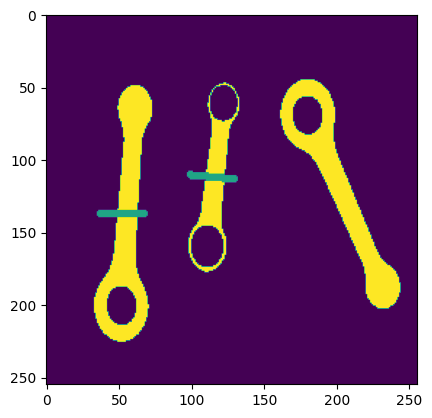

(185, 131)
VALORE INTENSITA': 0
(186, 131)
VALORE INTENSITA': 0
(187, 130)
VALORE INTENSITA': 0
(188, 130)
VALORE INTENSITA': 0
(189, 129)
VALORE INTENSITA': 0
(190, 129)
VALORE INTENSITA': 0
(191, 129)
VALORE INTENSITA': 0
(192, 128)
VALORE INTENSITA': 0
(193, 128)
VALORE INTENSITA': 0
(194, 128)
VALORE INTENSITA': 0
(195, 127)
VALORE INTENSITA': 0
(196, 127)
VALORE INTENSITA': 0
(197, 126)
VALORE INTENSITA': 255
(198, 126)
VALORE INTENSITA': 255
(199, 126)
VALORE INTENSITA': 255
(200, 125)
VALORE INTENSITA': 255
(201, 125)
VALORE INTENSITA': 255
(202, 125)
VALORE INTENSITA': 255
(203, 124)
VALORE INTENSITA': 255
(204, 124)
VALORE INTENSITA': 255
(205, 123)
VALORE INTENSITA': 255
(206, 123)
VALORE INTENSITA': 255
(207, 123)
VALORE INTENSITA': 255
(208, 122)
VALORE INTENSITA': 255
(209, 122)
VALORE INTENSITA': 255
(210, 122)
VALORE INTENSITA': 255
(211, 121)
VALORE INTENSITA': 0
(212, 121)
VALORE INTENSITA': 0
(213, 121)
VALORE INTENSITA': 0
(214, 120)
VALORE INTENSITA': 0
(215, 120)
V

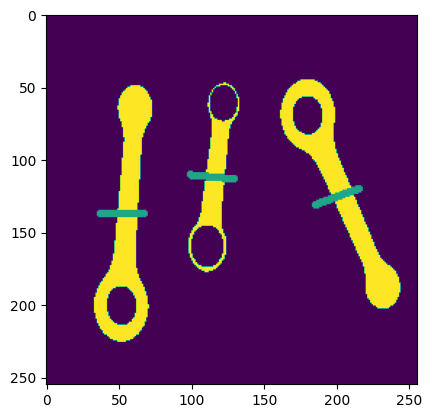

[15, 14, 14]
(37, 137)
VALORE INTENSITA': 0
(38, 137)
VALORE INTENSITA': 0
(39, 137)
VALORE INTENSITA': 0
(40, 137)
VALORE INTENSITA': 0
(41, 137)
VALORE INTENSITA': 0
(42, 137)
VALORE INTENSITA': 0
(43, 137)
VALORE INTENSITA': 0
(44, 137)
VALORE INTENSITA': 0
(45, 137)
VALORE INTENSITA': 0
(46, 137)
VALORE INTENSITA': 0
(47, 137)
VALORE INTENSITA': 0
(48, 137)
VALORE INTENSITA': 255
(49, 137)
VALORE INTENSITA': 255
(50, 137)
VALORE INTENSITA': 255
(51, 137)
VALORE INTENSITA': 255
(52, 137)
VALORE INTENSITA': 255
(53, 137)
VALORE INTENSITA': 255
(54, 137)
VALORE INTENSITA': 255
(55, 137)
VALORE INTENSITA': 255
(56, 137)
VALORE INTENSITA': 255
(57, 137)
VALORE INTENSITA': 255
(58, 137)
VALORE INTENSITA': 255
(59, 137)
VALORE INTENSITA': 255
(60, 137)
VALORE INTENSITA': 255
(61, 137)
VALORE INTENSITA': 255
(62, 137)
VALORE INTENSITA': 255
(63, 137)
VALORE INTENSITA': 0
(64, 137)
VALORE INTENSITA': 0
(65, 137)
VALORE INTENSITA': 0
(66, 137)
VALORE INTENSITA': 0
(67, 137)
VALORE INTENSITA'

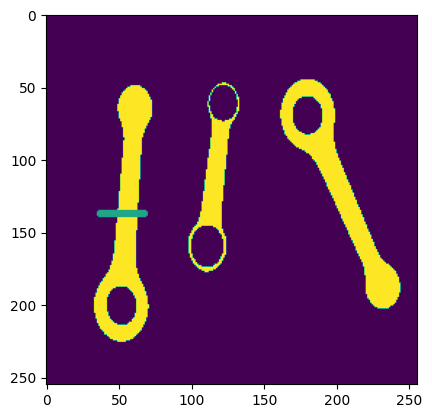

(99, 110)
VALORE INTENSITA': 0
(100, 111)
VALORE INTENSITA': 0
(101, 111)
VALORE INTENSITA': 0
(102, 111)
VALORE INTENSITA': 0
(103, 111)
VALORE INTENSITA': 0
(104, 111)
VALORE INTENSITA': 0
(105, 111)
VALORE INTENSITA': 0
(106, 111)
VALORE INTENSITA': 0
(107, 111)
VALORE INTENSITA': 0
(108, 111)
VALORE INTENSITA': 0
(109, 111)
VALORE INTENSITA': 255
(110, 111)
VALORE INTENSITA': 255
(111, 112)
VALORE INTENSITA': 255
(112, 112)
VALORE INTENSITA': 255
(113, 112)
VALORE INTENSITA': 255
(114, 112)
VALORE INTENSITA': 255
(115, 112)
VALORE INTENSITA': 255
(116, 112)
VALORE INTENSITA': 255
(117, 112)
VALORE INTENSITA': 255
(118, 112)
VALORE INTENSITA': 255
(119, 112)
VALORE INTENSITA': 255
(120, 112)
VALORE INTENSITA': 255
(121, 112)
VALORE INTENSITA': 255
(122, 113)
VALORE INTENSITA': 255
(123, 113)
VALORE INTENSITA': 0
(124, 113)
VALORE INTENSITA': 0
(125, 113)
VALORE INTENSITA': 0
(126, 113)
VALORE INTENSITA': 0
(127, 113)
VALORE INTENSITA': 0
(128, 113)
VALORE INTENSITA': 0
(129, 113)
VA

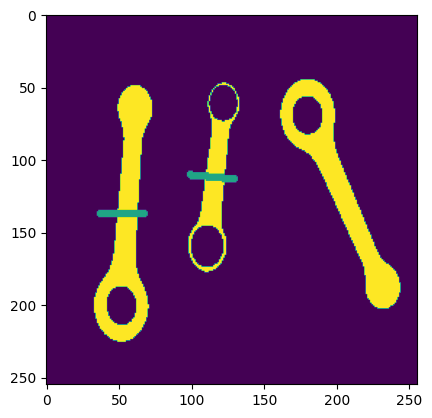

(185, 131)
VALORE INTENSITA': 0
(186, 131)
VALORE INTENSITA': 0
(187, 130)
VALORE INTENSITA': 0
(188, 130)
VALORE INTENSITA': 0
(189, 129)
VALORE INTENSITA': 0
(190, 129)
VALORE INTENSITA': 0
(191, 129)
VALORE INTENSITA': 0
(192, 128)
VALORE INTENSITA': 0
(193, 128)
VALORE INTENSITA': 0
(194, 128)
VALORE INTENSITA': 0
(195, 127)
VALORE INTENSITA': 0
(196, 127)
VALORE INTENSITA': 0
(197, 126)
VALORE INTENSITA': 255
(198, 126)
VALORE INTENSITA': 255
(199, 126)
VALORE INTENSITA': 255
(200, 125)
VALORE INTENSITA': 255
(201, 125)
VALORE INTENSITA': 255
(202, 125)
VALORE INTENSITA': 255
(203, 124)
VALORE INTENSITA': 255
(204, 124)
VALORE INTENSITA': 255
(205, 123)
VALORE INTENSITA': 255
(206, 123)
VALORE INTENSITA': 255
(207, 123)
VALORE INTENSITA': 255
(208, 122)
VALORE INTENSITA': 255
(209, 122)
VALORE INTENSITA': 255
(210, 122)
VALORE INTENSITA': 255
(211, 121)
VALORE INTENSITA': 0
(212, 121)
VALORE INTENSITA': 0
(213, 121)
VALORE INTENSITA': 0
(214, 120)
VALORE INTENSITA': 0
(215, 120)
V

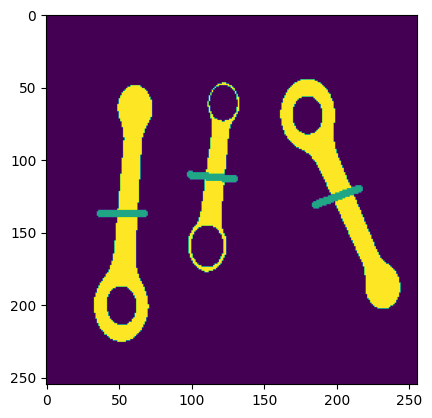

[15, 14, 14]


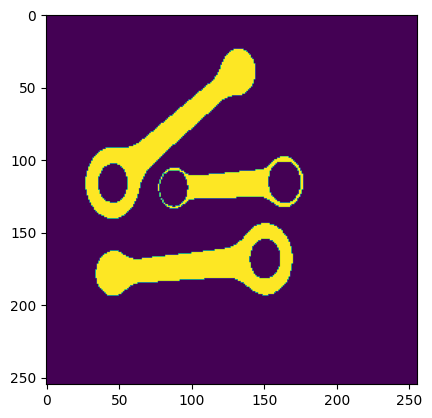

(124, -77)
VALORE INTENSITA': 255
(125, 0)
VALORE INTENSITA': 0
(126, 77)
VALORE INTENSITA': 0


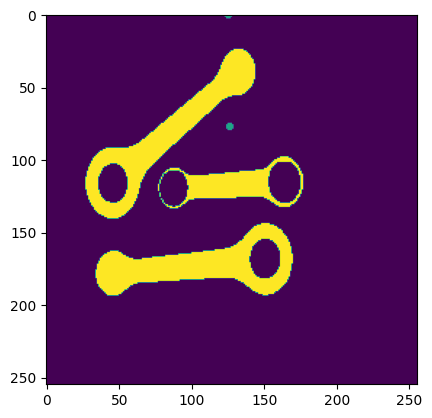

(68, 63)
VALORE INTENSITA': 0
(69, 64)
VALORE INTENSITA': 0
(70, 65)
VALORE INTENSITA': 0
(71, 66)
VALORE INTENSITA': 0
(72, 67)
VALORE INTENSITA': 0
(73, 68)
VALORE INTENSITA': 0
(74, 69)
VALORE INTENSITA': 0
(75, 70)
VALORE INTENSITA': 0
(76, 71)
VALORE INTENSITA': 0
(77, 72)
VALORE INTENSITA': 0
(78, 73)
VALORE INTENSITA': 0
(79, 74)
VALORE INTENSITA': 255
(80, 75)
VALORE INTENSITA': 255
(81, 76)
VALORE INTENSITA': 255
(82, 77)
VALORE INTENSITA': 255
(83, 78)
VALORE INTENSITA': 255
(84, 79)
VALORE INTENSITA': 255
(85, 80)
VALORE INTENSITA': 255
(86, 81)
VALORE INTENSITA': 255
(87, 81)
VALORE INTENSITA': 255
(88, 82)
VALORE INTENSITA': 255
(89, 83)
VALORE INTENSITA': 255
(90, 84)
VALORE INTENSITA': 255
(91, 85)
VALORE INTENSITA': 255
(92, 86)
VALORE INTENSITA': 0
(93, 87)
VALORE INTENSITA': 0
(94, 88)
VALORE INTENSITA': 0
(95, 89)
VALORE INTENSITA': 0
(96, 90)
VALORE INTENSITA': 0
(97, 91)
VALORE INTENSITA': 0
(98, 92)
VALORE INTENSITA': 0


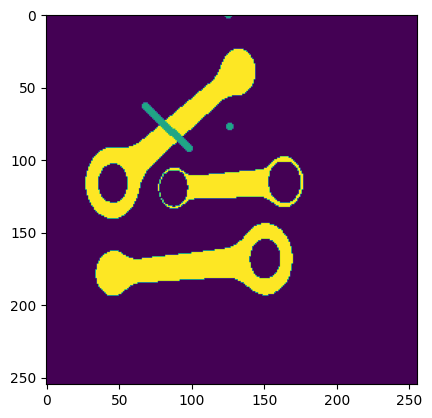

[0, 1, 13]
(138, 154)
VALORE INTENSITA': 0
(139, 155)
VALORE INTENSITA': 0
(140, 156)
VALORE INTENSITA': 0
(141, 157)
VALORE INTENSITA': 0
(142, 158)
VALORE INTENSITA': 255
(143, 159)
VALORE INTENSITA': 255
(144, 160)
VALORE INTENSITA': 255
(145, 161)
VALORE INTENSITA': 255
(146, 162)
VALORE INTENSITA': 255
(147, 163)
VALORE INTENSITA': 255
(148, 164)
VALORE INTENSITA': 255
(149, 164)
VALORE INTENSITA': 255
(150, 165)
VALORE INTENSITA': 255
(151, 166)
VALORE INTENSITA': 255
(152, 167)
VALORE INTENSITA': 255
(153, 168)
VALORE INTENSITA': 255
(154, 169)
VALORE INTENSITA': 255
(155, 170)
VALORE INTENSITA': 255
(156, 171)
VALORE INTENSITA': 255
(157, 172)
VALORE INTENSITA': 255
(158, 173)
VALORE INTENSITA': 255
(159, 174)
VALORE INTENSITA': 0
(160, 175)
VALORE INTENSITA': 0
(161, 176)
VALORE INTENSITA': 0
(162, 177)
VALORE INTENSITA': 0
(163, 178)
VALORE INTENSITA': 0
(164, 179)
VALORE INTENSITA': 0
(165, 180)
VALORE INTENSITA': 0
(166, 181)
VALORE INTENSITA': 0
(167, 182)
VALORE INTENSITA

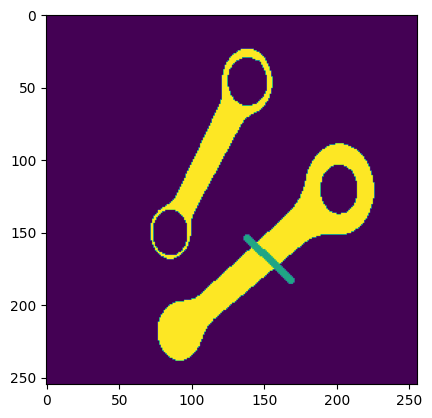

(99, 90)
VALORE INTENSITA': 0
(100, 90)
VALORE INTENSITA': 0
(101, 91)
VALORE INTENSITA': 0
(102, 91)
VALORE INTENSITA': 0
(103, 92)
VALORE INTENSITA': 0
(104, 92)
VALORE INTENSITA': 255
(105, 92)
VALORE INTENSITA': 255
(106, 93)
VALORE INTENSITA': 255
(107, 93)
VALORE INTENSITA': 255
(108, 94)
VALORE INTENSITA': 255
(109, 94)
VALORE INTENSITA': 255
(110, 95)
VALORE INTENSITA': 255
(111, 95)
VALORE INTENSITA': 255
(112, 96)
VALORE INTENSITA': 255
(113, 96)
VALORE INTENSITA': 255
(114, 97)
VALORE INTENSITA': 255
(115, 97)
VALORE INTENSITA': 255
(116, 98)
VALORE INTENSITA': 255
(117, 98)
VALORE INTENSITA': 255
(118, 99)
VALORE INTENSITA': 255
(119, 99)
VALORE INTENSITA': 255
(120, 100)
VALORE INTENSITA': 255
(121, 100)
VALORE INTENSITA': 0
(122, 100)
VALORE INTENSITA': 0
(123, 101)
VALORE INTENSITA': 0
(124, 101)
VALORE INTENSITA': 0
(125, 102)
VALORE INTENSITA': 0
(126, 102)
VALORE INTENSITA': 0
(127, 103)
VALORE INTENSITA': 0
(128, 103)
VALORE INTENSITA': 0
(129, 104)
VALORE INTENSITA'

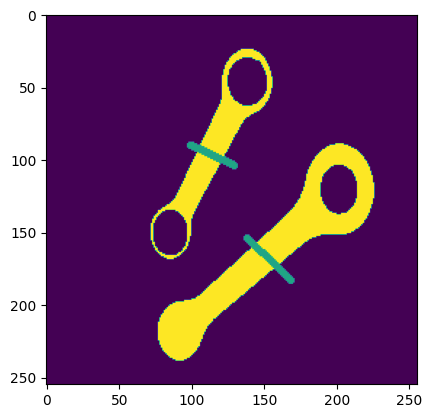

[17, 17]
(84, 128)
VALORE INTENSITA': 0


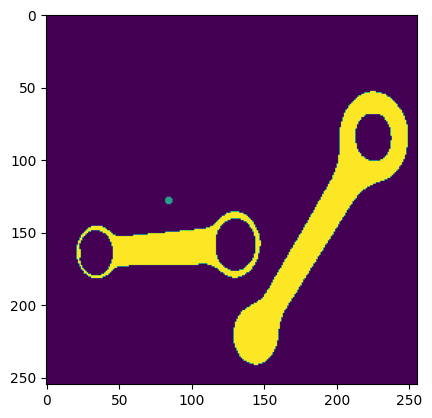

(175, 142)
VALORE INTENSITA': 0
(176, 142)
VALORE INTENSITA': 0
(177, 143)
VALORE INTENSITA': 0
(178, 143)
VALORE INTENSITA': 255
(179, 144)
VALORE INTENSITA': 255
(180, 144)
VALORE INTENSITA': 255
(181, 145)
VALORE INTENSITA': 255
(182, 145)
VALORE INTENSITA': 255
(183, 146)
VALORE INTENSITA': 255
(184, 146)
VALORE INTENSITA': 255
(185, 147)
VALORE INTENSITA': 255
(186, 147)
VALORE INTENSITA': 255
(187, 148)
VALORE INTENSITA': 255
(188, 148)
VALORE INTENSITA': 255
(189, 149)
VALORE INTENSITA': 255
(190, 149)
VALORE INTENSITA': 255
(191, 150)
VALORE INTENSITA': 255
(192, 150)
VALORE INTENSITA': 255
(193, 151)
VALORE INTENSITA': 255
(194, 151)
VALORE INTENSITA': 255
(195, 152)
VALORE INTENSITA': 255
(196, 152)
VALORE INTENSITA': 255
(197, 153)
VALORE INTENSITA': 0
(198, 154)
VALORE INTENSITA': 0
(199, 154)
VALORE INTENSITA': 0
(200, 155)
VALORE INTENSITA': 0
(201, 155)
VALORE INTENSITA': 0
(202, 156)
VALORE INTENSITA': 0
(203, 156)
VALORE INTENSITA': 0
(204, 157)
VALORE INTENSITA': 0
(2

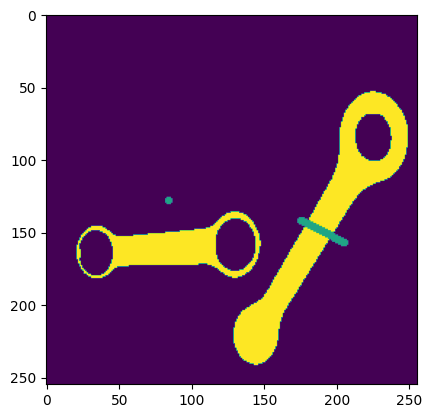

[0, 19]
(141, 120)
VALORE INTENSITA': 0
(142, 122)
VALORE INTENSITA': 0
(143, 123)
VALORE INTENSITA': 0
(144, 124)
VALORE INTENSITA': 0
(145, 125)
VALORE INTENSITA': 0
(146, 127)
VALORE INTENSITA': 0
(147, 128)
VALORE INTENSITA': 0
(148, 129)
VALORE INTENSITA': 0
(149, 130)
VALORE INTENSITA': 0
(150, 132)
VALORE INTENSITA': 0
(151, 133)
VALORE INTENSITA': 0
(152, 134)
VALORE INTENSITA': 0
(153, 135)
VALORE INTENSITA': 255
(154, 137)
VALORE INTENSITA': 255
(155, 138)
VALORE INTENSITA': 255
(156, 139)
VALORE INTENSITA': 255
(157, 140)
VALORE INTENSITA': 255
(158, 142)
VALORE INTENSITA': 255
(159, 143)
VALORE INTENSITA': 255
(160, 144)
VALORE INTENSITA': 255
(161, 145)
VALORE INTENSITA': 255
(162, 146)
VALORE INTENSITA': 255
(163, 148)
VALORE INTENSITA': 255
(164, 149)
VALORE INTENSITA': 255
(165, 150)
VALORE INTENSITA': 255
(166, 151)
VALORE INTENSITA': 255
(167, 153)
VALORE INTENSITA': 0
(168, 154)
VALORE INTENSITA': 0


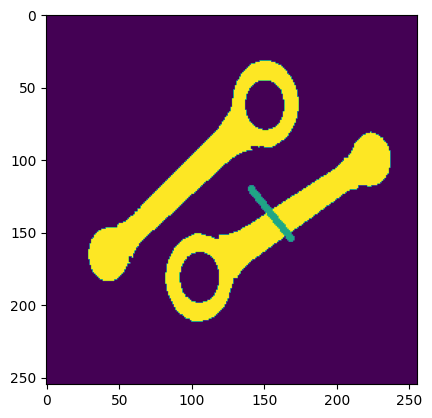

(88, 98)
VALORE INTENSITA': 0
(89, 99)
VALORE INTENSITA': 0
(90, 100)
VALORE INTENSITA': 0
(91, 101)
VALORE INTENSITA': 0
(92, 102)
VALORE INTENSITA': 0
(93, 103)
VALORE INTENSITA': 255
(94, 104)
VALORE INTENSITA': 255
(95, 105)
VALORE INTENSITA': 255
(96, 106)
VALORE INTENSITA': 255
(97, 107)
VALORE INTENSITA': 255
(98, 108)
VALORE INTENSITA': 255
(99, 109)
VALORE INTENSITA': 255
(100, 109)
VALORE INTENSITA': 255
(101, 110)
VALORE INTENSITA': 255
(102, 111)
VALORE INTENSITA': 255
(103, 112)
VALORE INTENSITA': 255
(104, 113)
VALORE INTENSITA': 255
(105, 114)
VALORE INTENSITA': 255
(106, 115)
VALORE INTENSITA': 255
(107, 116)
VALORE INTENSITA': 255
(108, 117)
VALORE INTENSITA': 0
(109, 118)
VALORE INTENSITA': 0
(110, 119)
VALORE INTENSITA': 0
(111, 119)
VALORE INTENSITA': 0
(112, 120)
VALORE INTENSITA': 0
(113, 121)
VALORE INTENSITA': 0
(114, 122)
VALORE INTENSITA': 0
(115, 123)
VALORE INTENSITA': 0
(116, 124)
VALORE INTENSITA': 0
(117, 125)
VALORE INTENSITA': 0
(118, 126)
VALORE INTENS

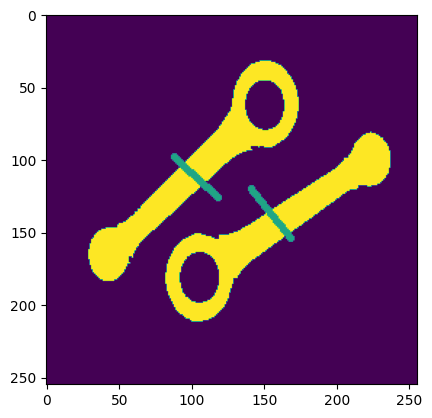

[14, 15]


In [20]:
# approach with full binarized images, scan using line equation given the major axis angle

def computeWb(img_index):
    img = np.copy(er_images[img_index])  # 🕷
    bar_pos_img = []
    Wbs = []
    for i, rod in enumerate(MER_dict[img_index][0]):   # iterating all the rods in the image
        bar_pos = rod[0]   # accessing and storing barycenter position in the list
        bar_pos_img.append(bar_pos)
        
        # line equation (perpendicular to major axis orientation)
        angle = rod[2]   # (0, 90] rotating clockwise
        width, length = rod[1]        
        if ( width < length):   # check for major axis orientation (linked with how the angle is computed by cv2.minAreaRect)
            angle += 90

        slope = np.tan(np.radians(angle + 90))
        q = bar_pos[1] - slope*bar_pos[0]   # q = Yc - mXc
        # print(f"slope: {slope} & q: {q}")

        # constraints of the line in a neighbour of the barycenter (assuming that the width of the rod is <= W_MAX, the square identified in the x,y 
        # region around the barycenter is the maximum draw region for each line. Thus hopefully avoiding intersection with other rods in the image.
        W_MAX = 15
        x_min = int(bar_pos[0]) - W_MAX
        y_min = int(bar_pos[1]) - W_MAX  
        x_max = int(bar_pos[0]) + W_MAX
        y_max = int(bar_pos[1]) + W_MAX  
        
        points = []
        pixel_count = 0
        for x in range(x_min, x_max+1):   # iterating all the x coordinates in the image, in the neighbour of the barycenter
            y_eq = int(np.round(slope*x + q))
            # y_eq = np.clip(y_eq, y_min, y_max)   # solve overflow for almost vertical lines with high slope
            if (np.abs(y_eq) > y_max):   # skipping saturated segments (this might be a problem for slopes -> inf) - either this or np.clip to avoid 'out of boud'
                continue
                
            print((x,y_eq))
            val_x = images_bin[img_index][y_eq,x]
            if (val_x == 255):
                points.append((x,y_eq))
                pixel_count += 1

            img = cv2.circle(img, (x, y_eq), 1, (150,0,0), 2)
            print(f"VALORE INTENSITA': {val_x}")

        Wb = pixel_count
        Wbs.append(Wb)   # all the width at barycenter for all the rods in the img_index image.
        pixel_count = 0

        plt.imshow(img)
        plt.show()

    return Wbs

##############################################
# attaching the width at barycenter in another dict
wb_dict = {}

for i in range(len(images)):
    wb_dict[i] = []
    temp_wbs = computeWb(i)
    print(temp_wbs)
    for j, rod in enumerate(MER_dict[i][0]):
        wb_dict[i].append(temp_wbs[j])

### Visualization of information on top of the original images

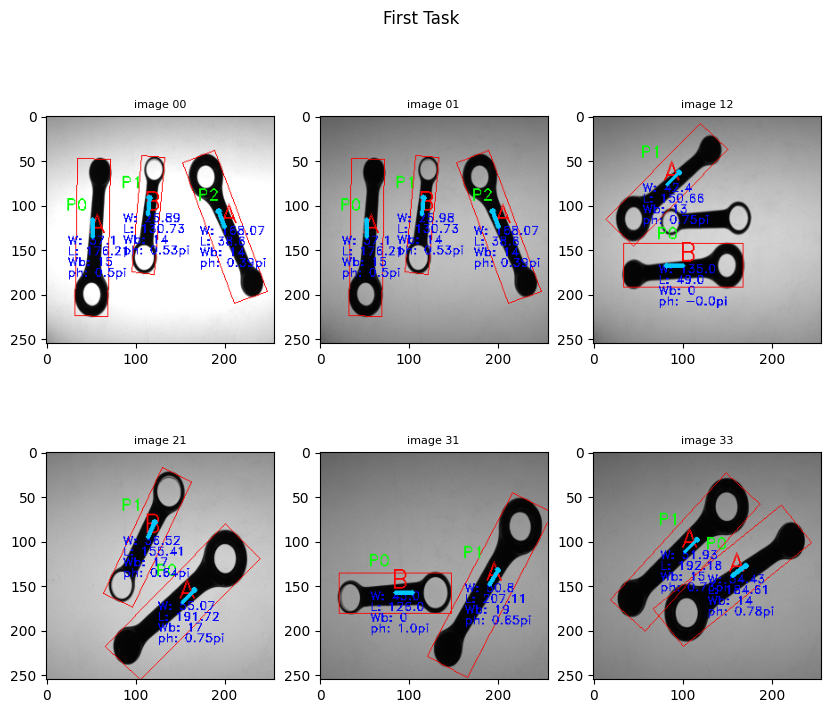

In [14]:
# lastly, visualizing rod type in front of if (using original backlight images)

fig11, axes11 = plt.subplots(2, 3, figsize=(10, 8))
fig11.suptitle("First Task")

for i in range(len(images)):
    img_copy  = np.copy(images[i])   # copy on which draw elements
    # blank_ch  = np.ones_like(img_copy)
    img_color = cv2.merge([img_copy, img_copy, img_copy])   # converting to BGR to later visualize colored MERs

    for j, rod in enumerate(MER_dict[i][0]):
        box = np.intp(cv2.boxPoints(rod))   # outputs the 4 vertexes of the input rectangle
        cv2.drawContours(img_color, [box], -1, (255,0,0), 1)
        cv2.putText(img_color, f"P{j}", org=tuple(map(np.intp, tuple(np.subtract(rod[0],30)))), fontFace=2, fontScale=0.6, color=(0,255,0))
        cv2.putText(img_color, MER_dict[i][2][j], org=tuple(map(np.intp, tuple(np.subtract(rod[0],5)))), fontFace=2, fontScale=1, color=(255,0,0))
        cv2.putText(img_color, f"W: {round(rod[1][0],2)}", org=tuple((int(rod[0][0])-28, int(rod[0][1])+8)), fontFace=2, fontScale=0.45, color=(0,0,255))
        cv2.putText(img_color, f"L: {round(rod[1][1],2)}", org=tuple((int(rod[0][0])-28, int(rod[0][1])+20)), fontFace=2, fontScale=0.45, color=(0,0,255))
        cv2.putText(img_color, f"Wb: {wb_dict[i][j]}", org=tuple((int(rod[0][0])-28, int(rod[0][1])+32)), fontFace=2, fontScale=0.45, color=(0,0,255))


        x = rod[0][0]
        y = rod[0][1]
        
        # ending point of arrow oriented along major axis
        theta = rod[2]
        width, length = rod[1]
        line_length = 20    
        
        if ( width < length):   # check for major axis orientation
            theta += 90
        
        x2 = x + line_length*np.cos(np.radians(theta+180))   # note: argument of np.cos/sin is in radians
        y2 = y + line_length*np.sin(np.radians(theta+180))
        
        cv2.putText(img_color, f"ph: {round(np.radians(theta)/np.pi,2)}pi", org=tuple((int(rod[0][0])-28, int(rod[0][1])+44)), fontFace=2, fontScale=0.45, color=(0,0,255))   # inserted modulo-pi notation with np.pi
        cv2.arrowedLine(img_color, tuple(map(int, rod[0])), (int(x2), int(y2)), (0,200,255), 4)
    
    axes11.flat[i].imshow(img_color)
    axes11.flat[i].set_title(f"image {image_numbers[i]}", size=8)
        
plt.show()